In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Data
# Ensure headers are attached correctly by explicitly specifying header row if needed
# If the first row of the CSV is the header, this will work as is.
# If not, adjust header= accordingly (e.g., header=0 or header=None and provide names).
df = pd.read_csv(
    "D:/LegoVR/unity-lego-vr/Other_than_in_project_files/ET_Data/P001_ET_Data_2025-07-31_Condition1.csv",
    header=0  # Change this if your header is not the first row
)
# Optionally, print the columns to verify correct header attachment
# print("Loaded columns:", df.columns.tolist())
df

,gaze_capture_time,raw_timestamp,relative_to_unix_epoch_timestamp,focus_distance,frame_number,stability,status,gaze_forward_x,gaze_forward_y,gaze_forward_z,...,hmd_position_z,hmd_rotation_x,hmd_rotation_y,hmd_rotation_z,hmd_rotation_w,model_name,model_number,is_building_model,model_start_time,model_end_time
0,1000097863493211900,1753959470346,256.6158,0.701319,2065384,1.000000,Valid,-0.201324,-0.129604,0.970913,...,-0.112409,0.258979,0.576911,-0.268009,0.726825,TM,1,False,-1,-1
1,1000097863498213900,1753959470347,256.6158,0.700384,2065385,0.999524,Valid,-0.201549,-0.128995,0.970947,...,-0.112409,0.258979,0.576911,-0.268009,0.726825,TM,1,False,-1,-1
2,1000097863503206300,1753959470347,256.6158,0.699618,2065386,0.613135,Valid,-0.200419,-0.128898,0.971194,...,-0.112409,0.258979,0.576911,-0.268009,0.726825,TM,1,False,-1,-1
3,1000097863508178900,1753959470347,256.6158,0.695411,2065387,0.276924,Valid,-0.196253,-0.129284,0.971993,...,-0.112409,0.258979,0.576911,-0.268009,0.726825,TM,1,False,-1,-1
4,1000097863513181800,1753959470348,256.6158,0.688357,2065388,0.052005,Valid,-0.188369,-0.129788,0.973485,...,-0.112409,0.258979,0.576911,-0.268009,0.726825,TM,1,False,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269636,1000099293399918500,1753960899795,1685.9990,0.957818,2351255,1.000000,Valid,-0.066804,-0.029953,0.997316,...,0.116869,0.154160,0.070145,-0.072175,0.982907,TM,9,False,1753960621215,1753960772662
269637,1000099293404920900,1753960899795,1685.9990,0.958034,2351256,1.000000,Valid,-0.066992,-0.030258,0.997295,...,0.116869,0.154160,0.070145,-0.072175,0.982907,TM,9,False,1753960621215,1753960772662
269638,1000099293409923300,1753960899795,1685.9990,0.958081,2351257,1.000000,Valid,-0.067189,-0.030582,0.997271,...,0.116869,0.154160,0.070145,-0.072175,0.982907,TM,9,False,1753960621215,1753960772662
269639,1000099293414915200,1753960899796,1685.9990,0.958830,2351258,1.000000,Valid,-0.067364,-0.030894,0.997250,...,0.116869,0.154160,0.070145,-0.072175,0.982907,TM,9,False,1753960621215,1753960772662


In [4]:
df.columns

Index(['gaze_capture_time', 'raw_timestamp',
       'relative_to_unix_epoch_timestamp', 'focus_distance', 'frame_number',
       'stability', 'status', 'gaze_forward_x', 'gaze_forward_y',
       'gaze_forward_z', 'gaze_origin_x', 'gaze_origin_y', 'gaze_origin_z',
       'left_forward_x', 'left_forward_y', 'left_forward_z', 'left_origin_x',
       'left_origin_y', 'left_origin_z', 'left_status', 'left_pupil_diameter',
       'left_iris_diameter', 'left_pupil_iris_ratio', 'left_eye_openness',
       'right_forward_x', 'right_forward_y', 'right_forward_z',
       'right_origin_x', 'right_origin_y', 'right_origin_z', 'right_status',
       'right_pupil_diameter', 'right_iris_diameter', 'right_pupil_iris_ratio',
       'right_eye_openness', 'inter_pupillary_distance', 'hmd_position_x',
       'hmd_position_y', 'hmd_position_z', 'hmd_rotation_x', 'hmd_rotation_y',
       'hmd_rotation_z', 'hmd_rotation_w', 'model_name', 'model_number',
       'is_building_model', 'model_start_time', 'model_e

Estimated average framerate: 188.57 Hz


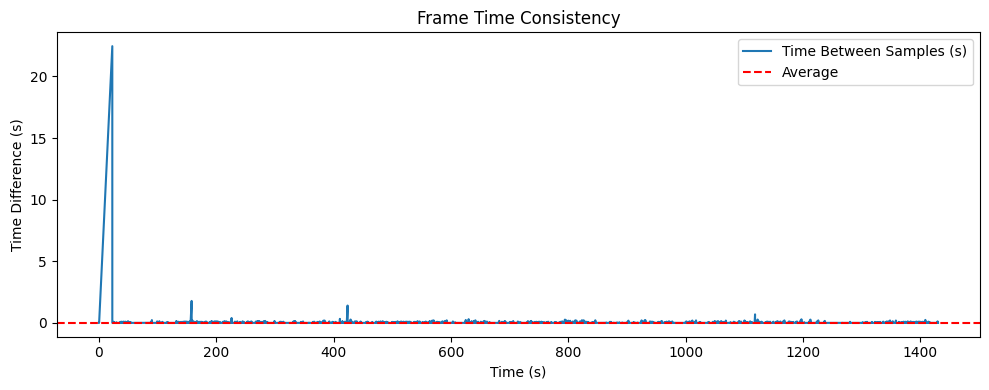

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure your timestamp column is in datetime format
df['raw_timestamp'] = pd.to_datetime(df['gaze_capture_time'])

# If 'gaze_capture_time' is in nanoseconds, convert to seconds for elapsed time
if pd.api.types.is_integer_dtype(df['gaze_capture_time']):
    df['time'] = (df['gaze_capture_time'] - df['gaze_capture_time'].iloc[0]) / 1e9
else:
    # If already datetime, use total seconds from the first timestamp
    df['time'] = (pd.to_datetime(df['gaze_capture_time']) - pd.to_datetime(df['gaze_capture_time'].iloc[0])).dt.total_seconds()

# Calculate time differences between consecutive frames in seconds
df['time_diff'] = df['time'].diff()

# Estimate framerate from average time difference (ignoring NaN from first diff)
average_framerate = 1 / df['time_diff'].dropna().mean()
print(f"Estimated average framerate: {average_framerate:.2f} Hz")

# Plot time_diff to visualize consistency, using 'time' on the x axis
plt.figure(figsize=(10, 4))
plt.plot(df['time'], df['time_diff'], label='Time Between Samples (s)')
plt.axhline(1/average_framerate, color='red', linestyle='--', label='Average')
plt.xlabel('Time (s)')
plt.ylabel('Time Difference (s)')
plt.title('Frame Time Consistency')
plt.legend()
plt.tight_layout()
plt.show()


In [11]:
df

,gaze_capture_time,raw_timestamp,relative_to_unix_epoch_timestamp,focus_distance,frame_number,stability,status,gaze_forward_x,gaze_forward_y,gaze_forward_z,...,hmd_rotation_y,hmd_rotation_z,hmd_rotation_w,model_name,model_number,is_building_model,model_start_time,model_end_time,time_diff,time
0,2001-09-10 04:57:43.493211900,2001-09-10 04:57:43.493211900,256.6158,0.701319,2065384,1.000000,Valid,-0.201324,-0.129604,0.970913,...,0.576911,-0.268009,0.726825,TM,1,False,-1,-1,NaN,0.000000
1,2001-09-10 04:57:43.498213900,2001-09-10 04:57:43.498213900,256.6158,0.700384,2065385,0.999524,Valid,-0.201549,-0.128995,0.970947,...,0.576911,-0.268009,0.726825,TM,1,False,-1,-1,0.005002,0.005002
2,2001-09-10 04:57:43.503206300,2001-09-10 04:57:43.503206300,256.6158,0.699618,2065386,0.613135,Valid,-0.200419,-0.128898,0.971194,...,0.576911,-0.268009,0.726825,TM,1,False,-1,-1,0.004992,0.009994
3,2001-09-10 04:57:43.508178900,2001-09-10 04:57:43.508178900,256.6158,0.695411,2065387,0.276924,Valid,-0.196253,-0.129284,0.971993,...,0.576911,-0.268009,0.726825,TM,1,False,-1,-1,0.004973,0.014967
4,2001-09-10 04:57:43.513181800,2001-09-10 04:57:43.513181800,256.6158,0.688357,2065388,0.052005,Valid,-0.188369,-0.129788,0.973485,...,0.576911,-0.268009,0.726825,TM,1,False,-1,-1,0.005003,0.019970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269636,2001-09-10 05:21:33.399918500,2001-09-10 05:21:33.399918500,1685.9990,0.957818,2351255,1.000000,Valid,-0.066804,-0.029953,0.997316,...,0.070145,-0.072175,0.982907,TM,9,False,1753960621215,1753960772662,0.004998,1429.906707
269637,2001-09-10 05:21:33.404920900,2001-09-10 05:21:33.404920900,1685.9990,0.958034,2351256,1.000000,Valid,-0.066992,-0.030258,0.997295,...,0.070145,-0.072175,0.982907,TM,9,False,1753960621215,1753960772662,0.005002,1429.911709
269638,2001-09-10 05:21:33.409923300,2001-09-10 05:21:33.409923300,1685.9990,0.958081,2351257,1.000000,Valid,-0.067189,-0.030582,0.997271,...,0.070145,-0.072175,0.982907,TM,9,False,1753960621215,1753960772662,0.005002,1429.916711
269639,2001-09-10 05:21:33.414915200,2001-09-10 05:21:33.414915200,1685.9990,0.958830,2351258,1.000000,Valid,-0.067364,-0.030894,0.997250,...,0.070145,-0.072175,0.982907,TM,9,False,1753960621215,1753960772662,0.004992,1429.921703


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your DataFrame
# Example: df = pd.read_csv('your_data.csv')

### Step 1: Convert Varjo timestamp (nanoseconds) to seconds
df['gaze_capture_time_sec'] = df['gaze_capture_time'] / 1e9

### Step 2: Convert to datetime (optional, for human-readable format)
df['gaze_capture_datetime'] = pd.to_datetime(df['gaze_capture_time_sec'], unit='s')

### Step 3: Calculate elapsed time from the first sample
start_time = df['gaze_capture_time_sec'].iloc[0]
df['elapsed_time_sec'] = df['gaze_capture_time_sec'] - start_time

### Step 4: Compute time difference between samples
df['time_diff'] = df['elapsed_time_sec'].diff()

### Step 5: Estimate framerate
average_framerate = 1 / df['time_diff'].dropna().mean()
print(f"Estimated average framerate: {average_framerate:.2f} Hz")

### Step 6: Visualize time difference over elapsed time
plt.figure(figsize=(10, 5))
plt.plot(df['elapsed_time_sec'], df['time_diff'], label='Time Between Samples (s)', color='blue')
plt.axhline(1/average_framerate, color='red', linestyle='--', label='Average Frame Time')
plt.xlabel('Elapsed Time (seconds)')
plt.ylabel('Frame Time (seconds)')
plt.title('Framerate Consistency Over Time')
plt.legend()
plt.tight_layout()
plt.show()


KeyError: 'elapsed_time_sec'

In [ ]:
# Install required packages for data analysis
%pip install ipykernel pandas matplotlib numpy seaborn jupyter

: 